# PPO Algorithm

This code performs PPO on the Patrolling Zoo environment.

In [36]:
%load_ext autoreload
%autoreload 2

import torch
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph
from algorithm.ppo import PPO

# set process priority low
import psutil
import os
if os.name == 'nt':
    psutil.Process(os.getpid()).nice(psutil.BELOW_NORMAL_PRIORITY_CLASS)
else:
    psutil.Process(os.getpid()).nice(10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Configuration

In [37]:
MAX_CYCLES = 50

""" ENV SETUP """
patrolGraph = PatrolGraph("patrolling_zoo/env/cumberland.graph")
env = parallel_env(patrolGraph, 3,
    require_explicit_visit=False,
    max_steps=MAX_CYCLES,
    reward_shift = 0.3
)

"""ALGO PARAMS"""
algo = PPO(
    env = env,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    ent_coef = 0.1,
    vf_coef = 0.1,
    clip_coef = 0.1,
    gamma = 0.99,
    batch_size = 1,
    stack_size = 4,
    frame_size = (64, 64),
    max_cycles = MAX_CYCLES,
    total_episodes = 10
)

c:\Users\Anthony\miniconda3\envs\patrolling_zoo\lib\site-packages\gymnasium\spaces\box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


# Training

In [38]:
stats = algo.train()

Training episode 0
Episodic Return: 24.33333396911621
Episode Length: 49

Training episode 1
Episodic Return: 36.33335494995117
Episode Length: 49

Training episode 2
Episodic Return: 21.666650772094727
Episode Length: 49

Training episode 3
Episodic Return: 37.333343505859375
Episode Length: 49

Training episode 4
Episodic Return: 29.333356857299805
Episode Length: 49

Training episode 5
Episodic Return: 28.333345413208008
Episode Length: 49

Training episode 6
Episodic Return: 36.66666793823242
Episode Length: 49

Training episode 7
Episodic Return: 24.666677474975586
Episode Length: 49

Training episode 8
Episodic Return: 30.33333396911621
Episode Length: 49

Training episode 9
Episodic Return: 25.333364486694336
Episode Length: 49



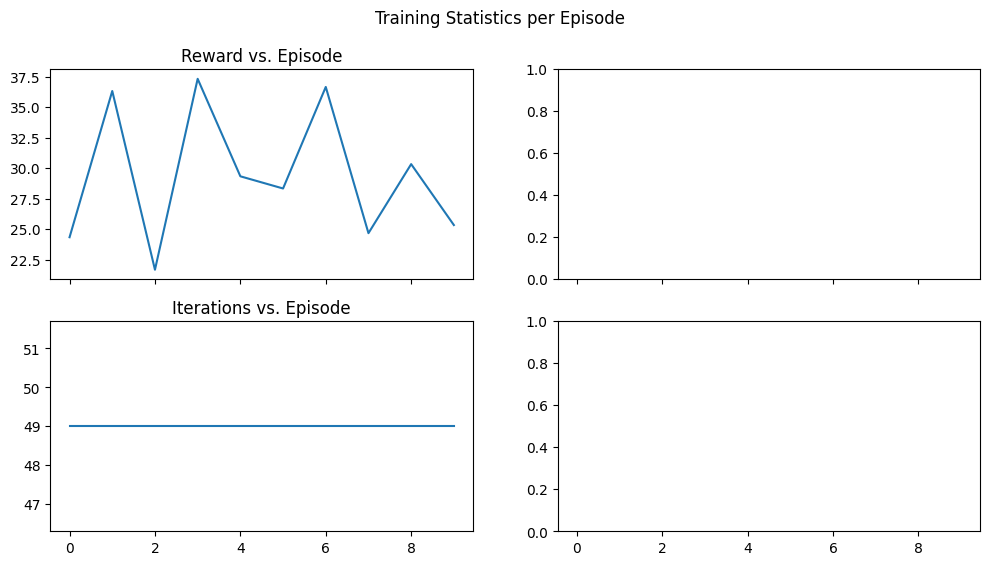

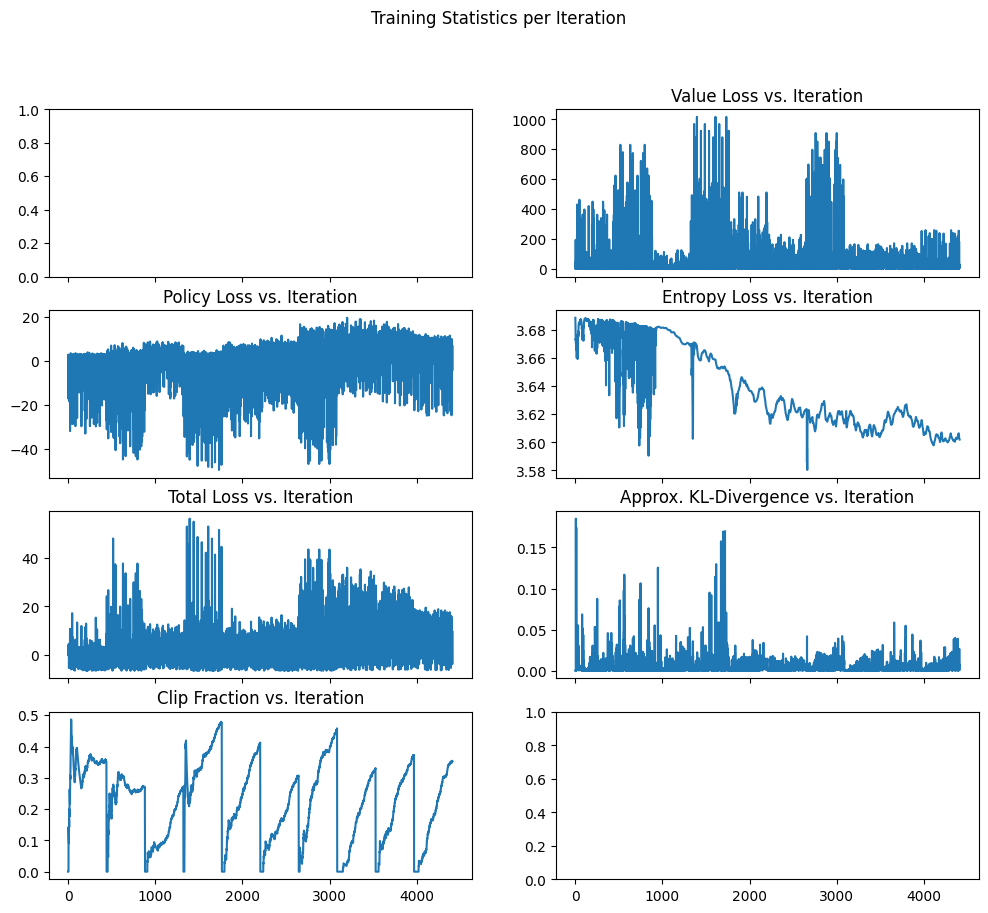

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(12, 6))
fig.suptitle("Training Statistics per Episode")

ax[0, 0].set_title("Reward vs. Episode")
ax[0, 0].plot(stats["episodic_return"])

ax[1, 0].set_title("Iterations vs. Episode")
ax[1, 0].plot(stats["episodic_length"])

plt.show()


fig, ax = plt.subplots(4, 2, sharex=True, figsize=(12, 10))
fig.suptitle("Training Statistics per Iteration")

ax[0, 1].set_title("Value Loss vs. Iteration")
ax[0, 1].plot(stats["value_loss"], label="value_loss")
# ax[0, 1].legend()

ax[1, 0].set_title("Policy Loss vs. Iteration")
ax[1, 0].plot(stats["policy_loss"], label="policy_loss")
# ax[1, 0].legend()

ax[1, 1].set_title("Entropy Loss vs. Iteration")
ax[1, 1].plot(stats["entropy_loss"], label="entropy_loss")
# ax[1, 1].legend()

ax[2, 0].set_title("Total Loss vs. Iteration")
ax[2, 0].plot(stats["total_loss"], label="total_loss")
# ax[2, 0].legend()

ax[2, 1].set_title("Approx. KL-Divergence vs. Iteration")
ax[2, 1].plot(stats["approx_kl"])

ax[3, 0].set_title("Clip Fraction vs. Iteration")
ax[3, 0].plot(stats["clip_frac"])

plt.show()


# Evaluation

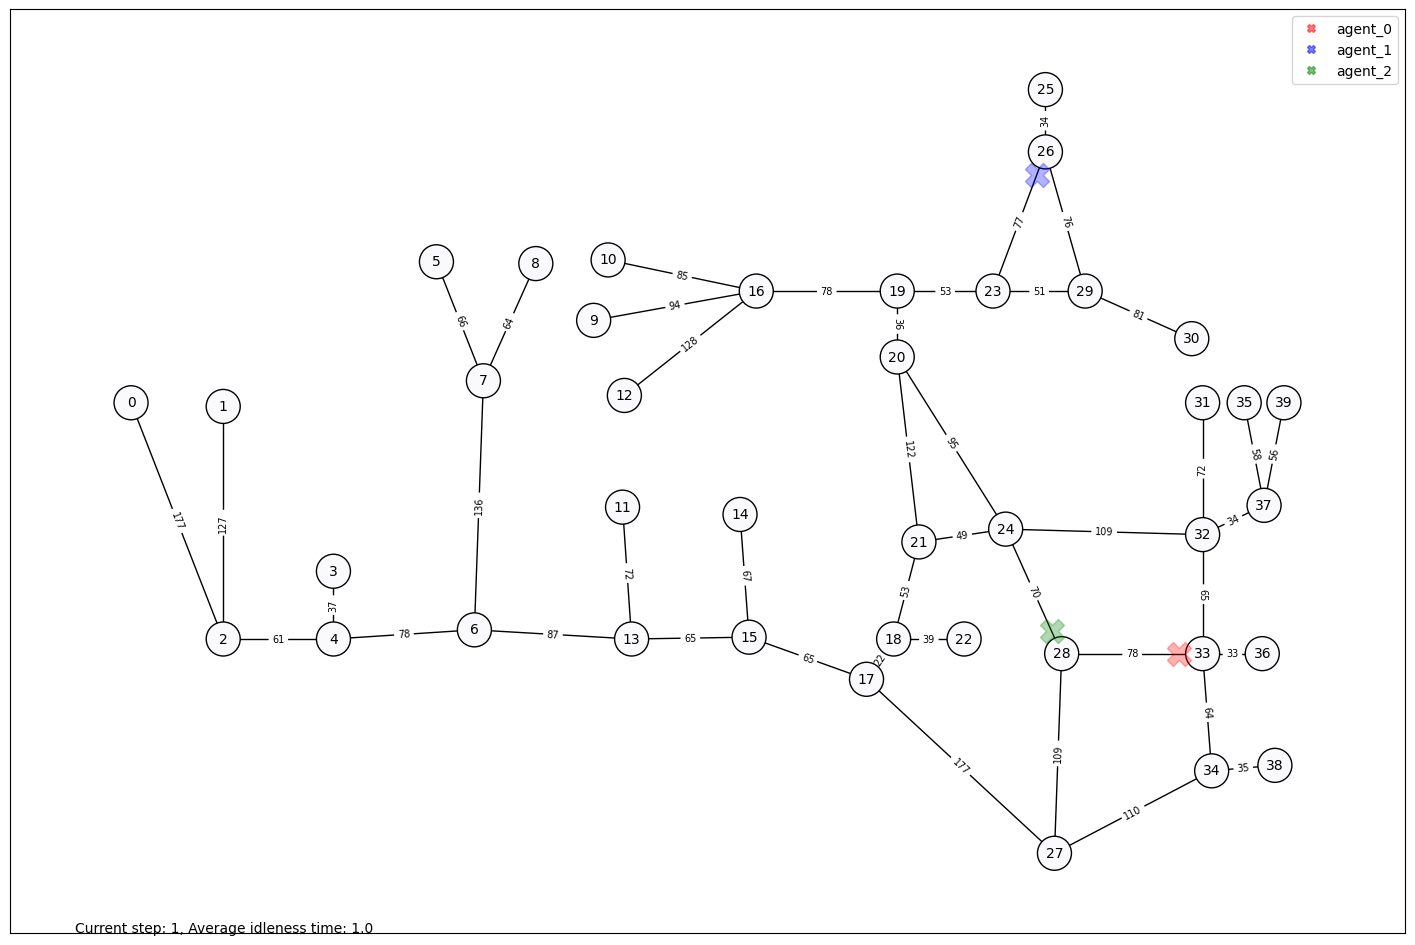

In [40]:
algo.evaluate(render=True, max_cycles=1)